# Spectrum kernel with Ridge Regression

In [1]:
import sys
sys.path.append('General')
sys.path.append('SVM')

import pandas as pd
import numpy as np
from time import time

from kernel_functions import kernel_spectrum
from spectrum_toolbox import preindexation,Spectrum_embedding

from SVM import SVM

from sklearn.model_selection import KFold
import scipy.sparse as sp

import matplotlib.pyplot as plt

from time import time

In [2]:
def GridSearch_spectrum(X,y,hyperparameters,K = 6):
    n_lengths = len(hyperparameters['lengths'])
    n_lambdas = len(hyperparameters['lambdas'])
    y[y==0] = -1
    
    scores_mean = np.zeros((n_lengths,n_lambdas))
    scores_std = np.zeros((n_lengths,n_lambdas))
    
    kf = KFold(n_splits = K)
    
    params = dict()
    
    for i in range(n_lengths):
        params['k'] = hyperparameters['lengths'][i]
        preindex = preindexation(params['k'])
        X_emb = Spectrum_embedding(X,params['k'],preindex = preindex)
        
        for j in range(n_lambdas):
            c = hyperparameters['lambdas'][j]
            acc = []
            
            for train_idx,test_idx in kf.split(X):
                model = SVM(c = c)
                Xtrain,Xtest = X_emb[train_idx,:],X_emb[test_idx,:]
                ytrain,ytest = y[train_idx],y[test_idx]              
                Ktrain = kernel_spectrum(Xtrain,Xtrain,{})
                Ktest = kernel_spectrum(Xtrain,Xtest,{})
                model.fit(Ktrain,ytrain[:,None])
                ypred = model.predict_class(Ktest)

                acc.append((ypred==ytest).mean())
            
            scores_mean[i,j] = np.array(acc).mean()
            scores_std[i,j] = np.array(acc).std()
        del(preindex)
    return(scores_mean,scores_std)

## K = 0

In [57]:
X = pd.read_csv('data/Xtr0.csv')
y = pd.read_csv('data/ytr0.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
0,TCCTGTGCACATCTGCACCCCTGTTGTGGCCACAAAATGATCCGGC...
1,TTAAGTGTATATCTAATAATTTTTTTGCCTACATTCCTGTGTTACC...
2,GTGCTCAATTAGTTGCCTACAAATAGTAGCCTGGCACAGTGTAAGC...
3,CACCTGGAAAATACAAACAGGCGCAAGAAGAGTTAACCCACAGATC...
4,AAATCACTGCCTATCCTTGGGCCAAAAGGTTTCTACAGGAAGCTGC...


In [3]:
hyperparameters = dict()
hyperparameters['lengths'] = np.arange(2,14)
hyperparameters['lambdas'] = np.logspace(-3,5,9)

In [55]:
start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

(334,)
(334,)
(334,)
(334,)
(333,)
(333,)


KeyboardInterrupt: 

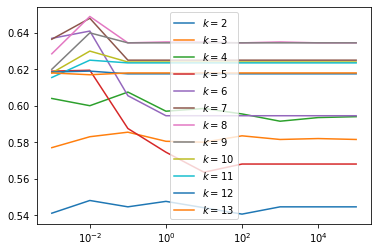

In [6]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()


In [58]:
k = 8
c = 1e-2

y = y['Bound'].to_numpy()
y[y==0] = -1

preindex = preindexation(k)
Xtrain = Spectrum_embedding(X['seq'].to_numpy(),k,preindex = preindex)
Ktrain = kernel_spectrum(Xtrain,Xtrain,{})

In [59]:
model0 = SVM(c= c)
model0.fit(Ktrain,y[:,None])

In [60]:
(model0.predict_class(Ktrain)==y).mean()

0.988

In [63]:
Xtest = pd.read_csv('data/Xte0.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)
Ktest = kernel_spectrum(Xtrain,Xtest,{})
ypred0 = model0.predict_class(Ktest)
ypred0[ypred0==-1]=0

## K = 1

In [4]:
X = pd.read_csv('data/Xtr1.csv')
y = pd.read_csv('data/ytr1.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
2000,AGAAATGAAAGTCATCCAAATAGGAAGAGAAGGAGTCAAAATATCC...
2001,TTCTCTCCAGCACTCTTGTCACCAACTCACATACCATACAGTTTAC...
2002,ACAGCTGACAAGCAGAACCCAGGGTCACAAGGATCCCATTCATGTG...
2003,CAAACTTTTCTATGTTTAGCCATGTGTTAATTAATAAGAAATGTTC...
2004,CTTCGTGGTTGGTCAAGAACGGCAGGAGGTATTTGCCCATCGGTGC...


In [5]:
from spectrum_toolbox import preindexation,Spectrum_embedding

start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

5832.729868173599


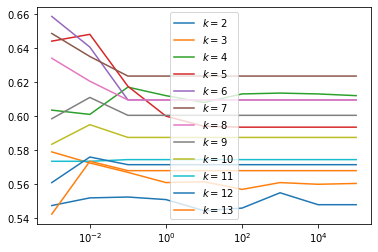

In [6]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()


In [65]:
k = 6
c = 1e-3

y = y['Bound'].to_numpy()
y[y==0] = -1

preindex = preindexation(k)
Xtrain = Spectrum_embedding(X['seq'].to_numpy(),k,preindex = preindex)
Ktrain = kernel_spectrum(Xtrain,Xtrain,{})

In [66]:
model1 = SVM(c= c)
model1.fit(Ktrain,y[:,None])

In [67]:
(model1.predict_class(Ktrain)==y).mean()

0.8135

In [68]:
Xtest = pd.read_csv('data/Xte1.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)
Ktest = kernel_spectrum(Xtrain,Xtest,{})
ypred1 = model1.predict_class(Ktest)
ypred1[ypred1==-1]=0

## K = 2

In [69]:
X = pd.read_csv('data/Xtr2.csv')
y = pd.read_csv('data/ytr2.csv')
X.set_index('Id',inplace = True)

X.head()

,seq
Id,
4000,GTGCCGACGCAGCGGTGTTGCACCTCCCTCTCCGGCTCTGCTGCCC...
4001,CCTGAGTTTGGTGTTCTGTGGAATTATTGAACCTAAGTAGGTAGTG...
4002,CCAGGTGCTTACCATTATCATGTAAGTTCTCTAACTGTTTCATGTG...
4003,AGAGCGGTGTGGGGGTCACTCAAGAGAACGTGCTGTACCTTGTCAG...
4004,CCCCAGGGGCAGGCGGGCTAGCCCCCCCATCATATGCAAATCATGG...


In [12]:
start = time()
mean,std = GridSearch_spectrum(X['seq'].to_numpy(),y['Bound'].to_numpy(),hyperparameters)
print(time()-start)

5581.852656841278


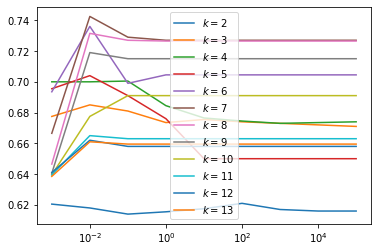

In [13]:
for k in range(len(hyperparameters['lengths'])):
    plt.semilogx(hyperparameters['lambdas'],mean[k,:],label = "$k = {0}$".format(hyperparameters['lengths'][k]))
plt.legend()


In [70]:
k = 7
c = 1e-2

y = y['Bound'].to_numpy()
y[y==0] = -1

preindex = preindexation(k)
Xtrain = Spectrum_embedding(X['seq'].to_numpy(),k,preindex = preindex)
Ktrain = kernel_spectrum(Xtrain,Xtrain,{})

In [71]:
model2 = SVM(c= c)
model2.fit(Ktrain,y[:,None])

In [72]:
(model2.predict_class(Ktrain)==y).mean()

0.979

In [73]:
Xtest = pd.read_csv('data/Xte2.csv')
Xtest = Spectrum_embedding(Xtest['seq'].to_numpy(),k,preindex = preindex)
Ktest = kernel_spectrum(Xtrain,Xtest,{})
ypred2 = model2.predict_class(Ktest)
ypred2[ypred2==-1]=0

In [97]:
ypred0 = np.hstack((pd.read_csv('data/Xte0.csv')['Id'].to_numpy()[:,None],ypred0[:,None]))
ypred1 = np.hstack((pd.read_csv('data/Xte1.csv')['Id'].to_numpy()[:,None],ypred1[:,None]))
ypred2 = np.hstack((pd.read_csv('data/Xte2.csv')['Id'].to_numpy()[:,None],ypred2[:,None]))

In [98]:
ypred = np.vstack((ypred0,ypred1,ypred2))

In [100]:
ypred

array([[   0,    1],
       [   1,    1],
       [   2,    1],
       ...,
       [2997,    0],
       [2998,    0],
       [2999,    1]])

In [106]:
pd.DataFrame(ypred, columns = ["Id", "Bound"]).set_index('Id').to_csv("SVM_Spectrum.csv")

In [105]:
pd.DataFrame(ypred, columns = ["Id", "Bound"]).set_index('Id')

,Bound
Id,
0,1
1,1
2,1
3,1
4,0
...,...
2995,1
2996,0
2997,0


In [95]:
pd.read_csv('data/Xte0.csv')['Id'].to_numpy().shape

(1000,)